<a href="https://colab.research.google.com/github/Gulshan979/deep_learning/blob/main/Sing_Language_With_GANs_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import kagglehub
datamunge_sign_language_mnist_path = kagglehub.dataset_download('datamunge/sign-language-mnist')

print('Data source import complete.')


Data source import complete.


# Content <a id = "cont"></a>
- [Data Review And Data Prepare](#1)
- [Generative Adversarial Networks(GANs)](#2)
    - [Create Generator](#2a)
    - [Create Discriminator](#2b)
    - [Create GANs](#2c)
    - [Train Model](#2d)
    - [Save Model](#2e)
    - [Visualizetion Result Of GANs](#2f)
- [CONCLUSION](#3)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


# Data Review And Data Prepare <a id = "1"></a>
[Go Content](#cont)

In this chapter, I reviewed the dataset and prepared the dataset for the GANs model.

In [3]:
# Read the data with pandas library
train = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

In [4]:
# Train data
print("Train shape: ", train.shape)
train

Train shape:  (27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [5]:
# Test data
print("Test shape: ", test.shape)
test

Test shape:  (7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


I prepared x and y values.

In [6]:
x_train = train.drop(labels = ["label"], axis = 1)
y_train = train["label"]

x_test = test.drop(labels = ["label"], axis = 1)
y_test = test["label"]

In [8]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,...,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,...,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,...,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,...,119,56,27,58,102,79,47,64,87,93


In [7]:
y_train

,label
0,3
1,6
2,2
3,2
4,13
...,...
27450,13
27451,23
27452,18
27453,17


I visualized the images in the dataset.

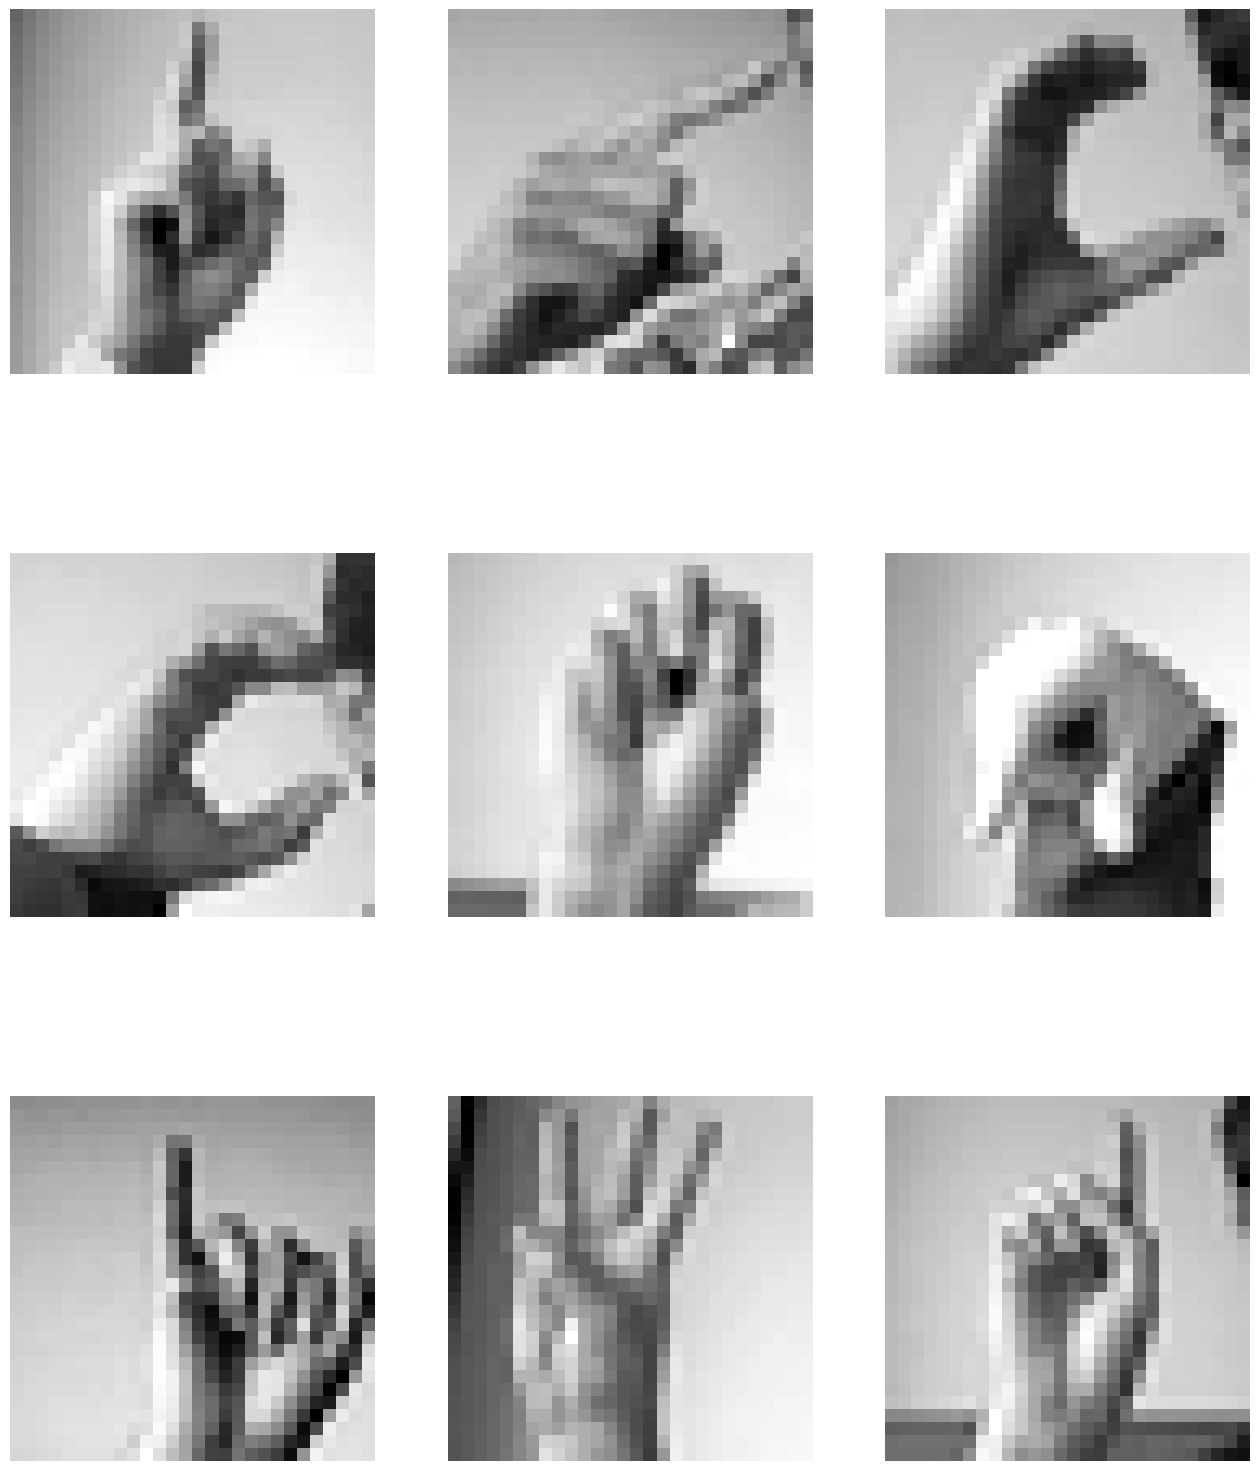

In [8]:
k = 0
row, col = 3, 3
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(16,20),)
for i in range(row):
    for j in range(col):
        img = x_train.iloc[k].to_numpy()
        img = img.reshape((28,28))
        ax[i,j].imshow(img,cmap = "gray")
        ax[i,j].axis("off")
        k += 1
plt.show()

I reduced the values of the dataset between zero-one.

In [9]:
x_train = x_train / 255.0 # Normalization
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.419608,0.462745,0.498039,0.525490,0.545098,0.560784,0.572549,0.588235,0.600000,0.611765,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.607843,0.615686,0.611765,0.611765,0.611765,0.615686,0.611765,0.619608,0.619608,0.615686,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.733333,0.737255,0.737255,0.733333,0.733333,0.729412,0.733333,0.737255,0.733333,0.729412,...,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.827451,0.827451,0.831373,0.831373,0.827451,0.823529,0.827451,0.823529,0.823529,0.827451,...,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.643137,0.654902,0.666667,0.674510,0.690196,0.701961,0.705882,0.721569,0.725490,0.729412,...,0.360784,0.411765,0.411765,0.423529,0.521569,0.639216,0.615686,0.639216,0.643137,0.701961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,0.741176,0.741176,0.745098,0.745098,0.752941,0.756863,0.756863,0.756863,0.756863,0.760784,...,0.517647,0.647059,0.388235,0.301961,0.203922,0.784314,0.917647,0.784314,0.870588,0.882353
27451,0.592157,0.603922,0.615686,0.619608,0.627451,0.631373,0.639216,0.643137,0.650980,0.654902,...,0.776471,0.776471,0.776471,0.776471,0.776471,0.768627,0.764706,0.764706,0.764706,0.760784
27452,0.682353,0.682353,0.682353,0.682353,0.682353,0.686275,0.686275,0.682353,0.678431,0.678431,...,0.474510,0.768627,0.819608,0.815686,0.807843,0.800000,0.796078,0.792157,0.784314,0.784314
27453,0.694118,0.709804,0.721569,0.725490,0.733333,0.741176,0.745098,0.749020,0.749020,0.745098,...,0.466667,0.219608,0.105882,0.227451,0.400000,0.309804,0.184314,0.250980,0.341176,0.364706


I visualized the normalized images.

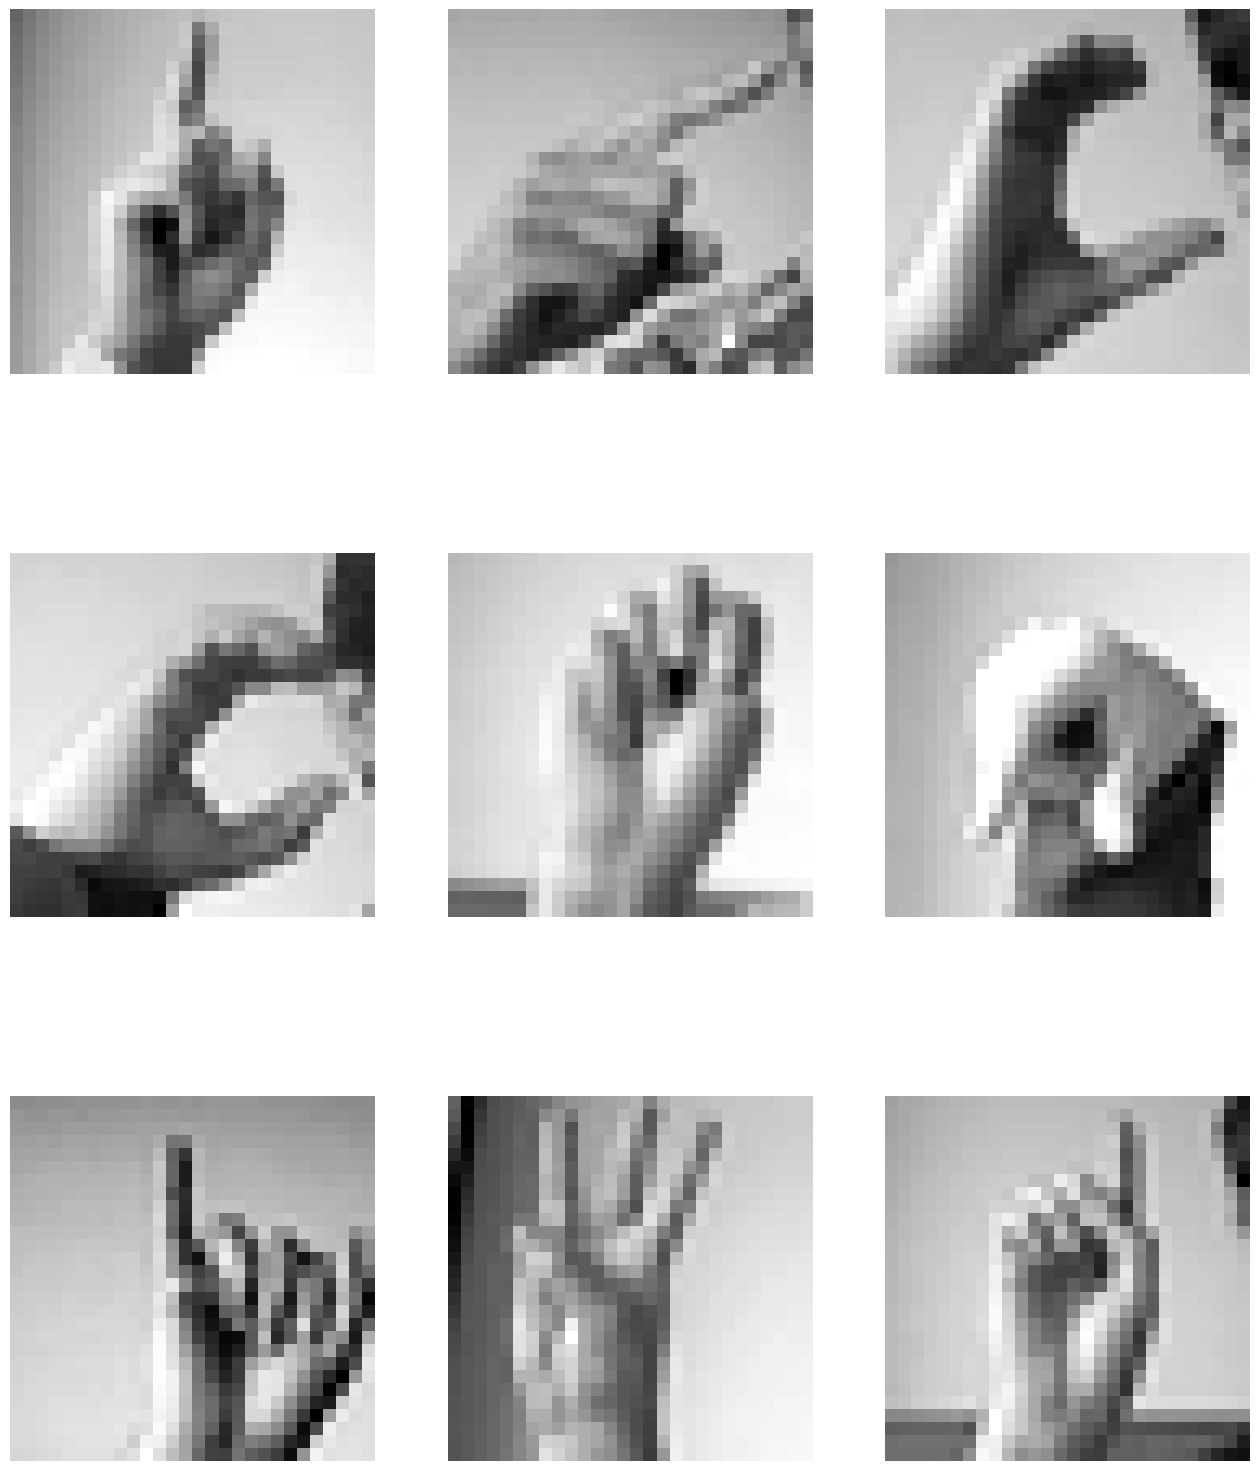

In [10]:
k = 0
row, col = 3, 3
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(16,20),)
for i in range(row):
    for j in range(col):
        img = x_train.iloc[k].to_numpy()
        img = img.reshape((28,28))
        ax[i,j].imshow(img,cmap = "gray")
        ax[i,j].axis("off")
        k += 1
plt.show()

- I converted x_train to an array.
- I reduced the values of the dataset between minus one-one.

In [11]:
x_train = x_train.to_numpy()
x_train = x_train * 2 - 1
print("x_train shape: ", x_train.shape)
x_train

x_train shape:  (27455, 784)


array([[-0.16078431, -0.0745098 , -0.00392157, ...,  0.6       ,
         0.59215686,  0.58431373],
       [ 0.21568627,  0.23137255,  0.22352941, ..., -0.19215686,
         0.05882353,  0.16862745],
       [ 0.46666667,  0.4745098 ,  0.4745098 , ...,  0.52941176,
         0.52156863,  0.52941176],
       ...,
       [ 0.36470588,  0.36470588,  0.36470588, ...,  0.58431373,
         0.56862745,  0.56862745],
       [ 0.38823529,  0.41960784,  0.44313725, ..., -0.49803922,
        -0.31764706, -0.27058824],
       [ 0.40392157,  0.41176471,  0.41176471, ...,  0.60784314,
         0.63921569,  0.68627451]])

# Generative Adversarial Networks(GANs) <a id = "2"></a>
[Go Content](#cont)

**What is the Generative Adversarial Networks(GANs)?**

A generative adversarial network (GAN) is a class of machine learning frameworks designed by Ian Goodfellow and his colleagues in June 2014. Two neural networks contest with each other in a game in the form of a zero-sum game, where one agent's gain is another agent's loss.

Given a training set, this technique learns to generate new data with the same statistics as the training set. For example, a GAN trained on photographs can generate new photographs that look at least superficially authentic to human observers, having many realistic characteristics. Though originally proposed as a form of generative model for unsupervised learning, GANs have also proved useful for semi-supervised learning, fully supervised learning,and reinforcement learning.

If you want more information about GANs model, [click here.](https://en.wikipedia.org/wiki/Generative_adversarial_network)

![GANs](https://www.researchgate.net/publication/340481789/figure/fig1/AS:877673731596293@1586265132992/The-original-generative-adversarial-network-GAN-model-In-simple-terms-G-wants-to.png)

- Generator: In this chapter, generate fake images.
- Discriminator: In this chapter, Decide whether the image is fake or real.
- To create a better fake picture, after the decision part, the fake picture created by going back to the generator section during the training is developing.

## Create Generator <a id = "2a"></a>
[Go Content](#cont)

In this chapter, I created the generator model.

In [12]:
def create_generator():

    generator = Sequential()
    generator.add(Dense(units = 256, input_dim = 100))
    generator.add(ReLU())

    generator.add(Dense(units = 512))
    generator.add(ReLU())

    generator.add(Dense(units = 1024))
    generator.add(ReLU())

    generator.add(Dense(units = 784, activation = "tanh"))

    generator.compile(loss = "binary_crossentropy",
                     optimizer = Adam(learning_rate = 0.0002, beta_1 = 0.5))

    return generator

In [13]:
# Structure of Generator model
g = create_generator()
g.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       803,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,486,352 (5.67 MB)

 Trainable params: 1,486,352 (5.67 MB)

 Non-trainable params: 0 (0.00 B)

##  Create Discriminator <a id = "2b"></a>
[Go Content](#cont)

In this chapter, I created the Discriminator model.

In [14]:
def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(units = 1024, input_dim = 784))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(units = 512))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(units = 256))
    discriminator.add(ReLU())

    discriminator.add(Dense(units = 1, activation = "sigmoid"))

    discriminator.compile(loss = "binary_crossentropy",
                         optimizer = Adam(learning_rate = 0.0002, beta_1 = 0.5))

    return discriminator

In [15]:
# Structure of discriminator model
d = create_discriminator()
d.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,460,225 (5.57 MB)

 Trainable params: 1,460,225 (5.57 MB)

 Non-trainable params: 0 (0.00 B)

## Create GANs <a id = "2c"></a>
[Go Content](#cont)

In this chapter, I created the GANs model.

In [16]:
def create_gan(discriminator, generator):
    discriminator.trainable = False
    gan_input = Input(shape = (100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs = gan_input, outputs = gan_output)
    gan.compile(loss = "binary_crossentropy", optimizer = "adam")
    return gan

In [17]:
# Structure of GANs model
gan = create_gan(d,g)
gan.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 784)            │     1,486,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 1)              │     1,460,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,946,577 (11.24 MB)

 Trainable params: 1,486,352 (5.67 MB)

 Non-trainable params: 1,460,225 (5.57 MB)

## Train Model <a id = "2d"></a>
[Go Centent](#cont)

In this chapter, I am Training GANs model with the dataset.

In [18]:
import time

epochs = 50
batch_size = 128

dis_loss = []
gen_loss = []

for e in range(epochs):
    for _ in range(batch_size):
        start = time.time()
        noise = np.random.normal(0, 1, [batch_size, 100])

        generated_image = g.predict(noise)

        image_batch = x_train[np.random.randint(low = 0, high = x_train.shape[0], size = batch_size)]

        x = np.concatenate([image_batch, generated_image])

        y_dis = np.zeros(batch_size*2)
        y_dis[:batch_size] = 0.9

        d.trainable = True
        dloss = d.train_on_batch(x, y_dis)


        noise = np.random.normal(0, 1, [batch_size, 100])

        y_gen = np.ones(batch_size)

        d.trainable = False

        gloss =  gan.train_on_batch(noise, y_gen)

        end = time.time()
        process_time = str(end - start)

    dis_loss.append(dloss)
    gen_loss.append(gloss)

    print("Epoch: {}, Time: {}s, Generator Loss: {:.3f}, Discriminator Loss: {:.3f}".format(e, process_time[2:4], gloss, dloss))

Streaming output truncated to the last 5000 lines.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

## Save Model <a id = "2e"></a>
[Go Content](#cont)

In this chapter, I registered the weights of the model.

In [20]:
g.save_weights("gans_model.weights.h5")

## Visualizetion Result Of GANs <a id = "2f"></a>
[Go Content](#cont)

I visualized the images created by GANs model in this chapter.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


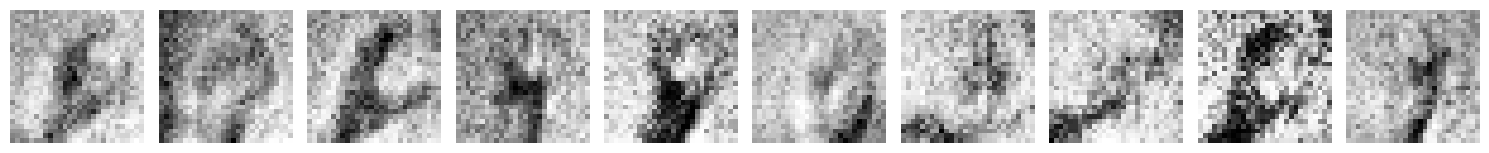

In [21]:
noise = np.random.normal(loc = 0, scale = 1, size = [100,100])
generated_image = g.predict(noise)
generated_image = generated_image.reshape(100, 28, 28)
plt.figure(figsize=(15,17))
for i in range(0,10):
    plt.subplot(1, 10, i+1)
    plt.imshow(generated_image[i], interpolation = "nearest", cmap = "gray")
    plt.axis("off")
    plt.tight_layout()
plt.show()

/tmp/ipython-input-22-2248404538.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


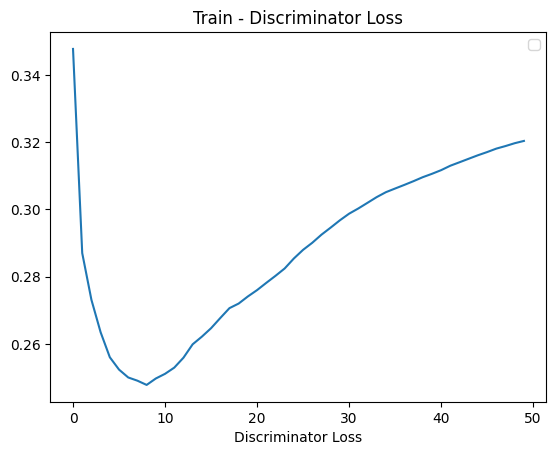

In [22]:
# Train and Test Discriminator Loss graphic
epochs_number = []
for i in range(0,epochs):
    epochs_number.append(i)

plt.plot(epochs_number, dis_loss)
plt.title("Train - Discriminator Loss")
plt.xlabel("Number of Epochs")
plt.xlabel("Discriminator Loss")
plt.legend()
plt.show()

/tmp/ipython-input-23-3825787783.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


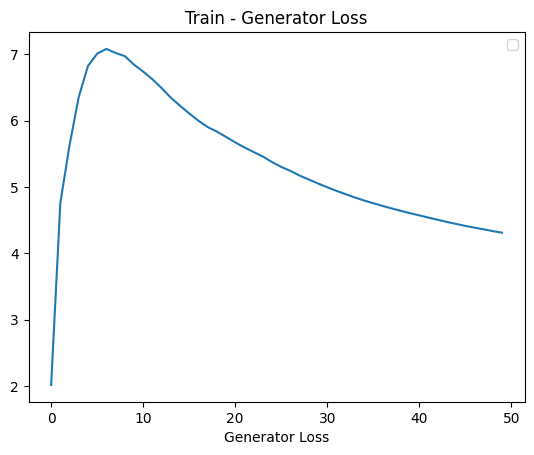

In [23]:
# Train and Test Generator Loss graphic
plt.plot(epochs_number, gen_loss)
plt.title("Train - Generator Loss")
plt.xlabel("Number of Epochs")
plt.xlabel("Generator Loss")
plt.legend()
plt.show()